In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve

In [2]:
data=load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
df=pd.DataFrame(data['data'],columns=data['feature_names'])
df['target']=data['target']
df.shape

(569, 31)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [6]:
cols=list(df.columns)
cols.remove('target')

X=df[cols]
y=df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [7]:
clf = LogisticRegression(max_iter = 3000, class_weight = 'balanced')
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
y_score=clf.predict_proba(X_test)

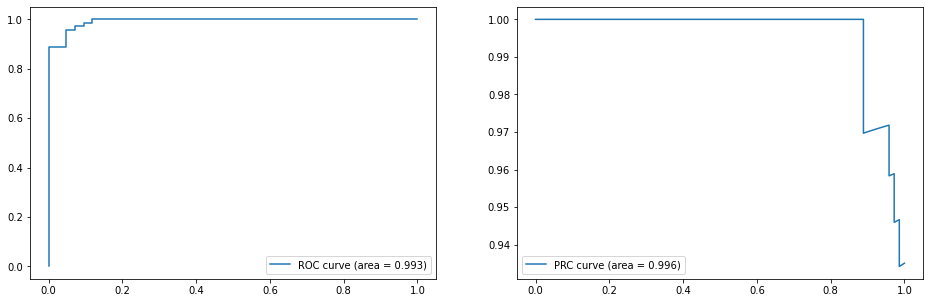

In [8]:
fig = plt.figure(figsize=(16,5))

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

prec, rec, thresholds = precision_recall_curve(y_test, y_score[:,1], pos_label=1)
prc_auc = auc(rec, prec)

plt.subplot(121)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.legend()

plt.subplot(122)
plt.plot(rec, prec, label='PRC curve (area = %0.3f)' % prc_auc)
plt.legend()

plt.show()

In [9]:
def find_outcome(actual_label, predicted_label):
    
    if (actual_label==predicted_label):
        if (actual_label==1):
            return 'TP'
        else:
            return 'TN'
        
    else:
        if (actual_label==1):
            return 'FN'
        else:
            return 'FP'

In [10]:
def find_roc_metrics(y_true, y_score, threshold):
    
    y_pred = (y_score[:,1]>=threshold)*1
    
    outcomes = np.array(list(map(lambda x,y: find_outcome(x,y), y_true, y_pred)))
    
    tp = sum(outcomes=='TP')
    tn = sum(outcomes=='TN')
    fp = sum(outcomes=='FP')
    fn = sum(outcomes=='FN')
    
    if (tp==0):
        tpr = 0
    else:
        tpr = tp / (tp + fn)

    if (fp==0):
        fpr=0
    else:
        fpr = fp / (fp + tn)
        
    return tpr, fpr

In [11]:
def find_prc_metrics(y_true, y_score, threshold):

    y_pred = (y_score[:,1]>=threshold)*1
    
    outcomes = np.array(list(map(lambda x,y: find_outcome(x,y), y_true, y_pred)))
    
    tp = sum(outcomes=='TP')
    tn = sum(outcomes=='TN')
    fp = sum(outcomes=='FP')
    fn = sum(outcomes=='FN')
    
    if (tp==0):
        prec = 0
    else:
        prec = tp / (tp + fp)
        
    if (tp==0):
        rec = 0
    else:
        rec = tp / (tp + fn)
        
    return prec, rec

In [12]:
N_DATAPOINTS = 100
thresholds = np.linspace(0,1,N_DATAPOINTS)

roc_metrics = np.array(list(map(lambda x: find_roc_metrics(y_test, y_score, x), thresholds)))

tpr = roc_metrics[:,0]
fpr = roc_metrics[:,1]

In [13]:
%%time

N_DATAPOINTS = 100000
thresholds = np.linspace(0,1,N_DATAPOINTS)

prc_metrics = np.array(list(map(lambda x: find_prc_metrics(y_test, y_score, x), thresholds)))

prec = prc_metrics[:,0][:-1]
rec = prc_metrics[:,1][:-1]

Wall time: 2min 19s


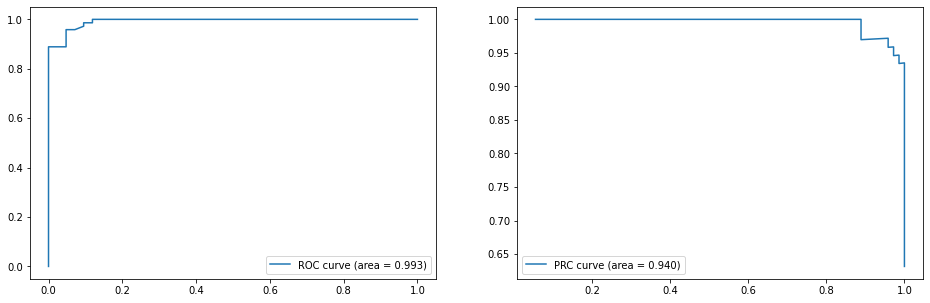

In [14]:
fig = plt.figure(figsize=(16,5))

roc_auc = auc(fpr, tpr)

prc_auc = auc(rec, prec)

plt.subplot(121)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.legend()

plt.subplot(122)
plt.plot(rec, prec, label='PRC curve (area = %0.3f)' % prc_auc)
plt.legend()

plt.show()